# Критерий Хи-квадрат для проверки нормальности

In [357]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
with open("C:\\Users\\admin\\Dropbox\\5 семестр\\ТВ и Мат Стат\\11.7.txt") as file:
    a = np.array(list(map(float, file.read().replace(',', '.').split())))

In [359]:
len(a)

100

In [360]:
sum(a)

1194.4200000000003

In [361]:
b = np.sort(a)
b

array([10.4 , 10.53, 10.8 , 10.85, 10.98, 10.99, 11.03, 11.13, 11.3 ,
       11.32, 11.34, 11.38, 11.38, 11.39, 11.4 , 11.47, 11.5 , 11.55,
       11.56, 11.57, 11.57, 11.6 , 11.62, 11.62, 11.65, 11.68, 11.7 ,
       11.71, 11.72, 11.72, 11.74, 11.75, 11.79, 11.79, 11.81, 11.81,
       11.81, 11.86, 11.87, 11.88, 11.89, 11.89, 11.9 , 11.92, 11.92,
       11.92, 11.93, 11.94, 11.96, 11.97, 11.98, 11.98, 11.98, 11.99,
       12.  , 12.  , 12.05, 12.07, 12.08, 12.1 , 12.1 , 12.1 , 12.1 ,
       12.11, 12.11, 12.11, 12.15, 12.15, 12.15, 12.16, 12.17, 12.18,
       12.19, 12.19, 12.23, 12.36, 12.37, 12.38, 12.39, 12.39, 12.42,
       12.42, 12.42, 12.42, 12.44, 12.45, 12.45, 12.45, 12.45, 12.46,
       12.58, 12.6 , 12.67, 12.7 , 12.77, 12.86, 12.88, 12.93, 12.95,
       12.97])

# Равночастотные интервалы

In [362]:
# ni - кол-во элементов выборки в интервале
# n - кол-во интервалов
ni = 10
n = int(len(a) / ni)
n

10

In [363]:
import math
from scipy import stats

## Интервалы вида ( ; ]( ; ]...( ; ]( ; )

In [364]:
# intervals - интервалы разбиения (n штук)
intervals = [(float('-inf'), b[9])]

for i in range(1, n - 1):
    intervals.append((b[i * ni - 1], b[i * ni + (ni - 1)]))

intervals.append((b[len(b) - (ni + 1)], float('+inf')))
intervals

[(-inf, 11.32),
 (11.32, 11.57),
 (11.57, 11.72),
 (11.72, 11.88),
 (11.88, 11.97),
 (11.97, 12.1),
 (12.1, 12.16),
 (12.16, 12.39),
 (12.39, 12.46),
 (12.46, inf)]

In [365]:
MX = sum(a) / len(a)
DX = sum((a - MX) ** 2) / len(a)
S = math.sqrt(DX)
normal = stats.norm(loc=MX, scale=S)

In [366]:
l2 = []
for i in range(n):
    l2.append(normal.cdf(intervals[i][1]) - normal.cdf(intervals[i][0]))
l2

[0.11053455639017529,
 0.12106574901997796,
 0.09854037259543313,
 0.11978126594237304,
 0.07024742716785409,
 0.09981222376029597,
 0.043891666616652,
 0.1450546542490737,
 0.035107269310600486,
 0.1559648149475643]

In [367]:
sum(l2)

1.0

\begin{equation*}
\left( \sum_{i=1}^n n_i ln(p_i(\theta)) \right) \rightarrow \max\limits_{\theta}
\end{equation*}

$$\forall i \; n_i = 10$$

\begin{equation*}
\Rightarrow \, \sim \left( \sum_{i=1}^n ln(p_i(\theta)) \right) \rightarrow \max\limits_{\theta}
\end{equation*}

In [368]:
from scipy.integrate import quad
import scipy.optimize as opt
from scipy.optimize import Bounds
from scipy.optimize import minimize

In [369]:
intervals[0][0], intervals[0][1]

(-inf, 11.32)

In [370]:
MX, S

(11.944200000000002, 0.5100964222575962)

In [371]:
def integrand10(tt, MX, S):
     return ((tt - MX) / S / S * math.e ** ((- (tt - MX) ** 2) / 2 / S / S))
    
def integrand11(tt, MX, S):
     return ((tt - MX) ** 2 / S / S / S * math.e ** ((- (tt - MX) ** 2) / 2 / S / S))

def jacobian(x, MX, S):
    return np.array(quad(integrand10 / integrate2, intervals[0][0], intervals[0][1], args=(MX,S)), 
                    -1 / S + quad(integrand11 / integrate2, intervals[0][0], intervals[0][1], args=(MX,S)))

In [374]:
def integrand2(t, MX, S):
    return  -(1 / math.sqrt(2 * math.pi) / S * math.e ** ((- (t - MX) ** 2) / 2 / S / S))


def my_function2(parameters):
    MX = parameters[0]
    S = parameters[1]
   
  #  print([(quad(integrand2, intervals[i][0], intervals[i][1], args=(MX, S))[0], intervals[i], MX, S) for i in range(len(intervals))])

    return sum([math.log(abs(quad(integrand2, intervals[i][0], intervals[i][1], args=(MX, S))[0])) 
            for i in range(len(intervals)) if abs(quad(integrand2, intervals[i][0], intervals[i][1], args=(MX, S))[0]) != 0.])

MX_0 = MX
S_0 = S

# пределы мат ожидания от минимального до максимального по выборке
# для дисперсии от 0 до inf
bounds = Bounds([b[0], 0], [b[99], float('+inf')])

for method in ['L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP']:
    print(method, ':')
    res = opt.minimize(my_function2, np.asarray([MX_0, S_0]), method=method, tol=1e-6, options={'maxiter': 500}, bounds=bounds)
    print(res, '\n')

for method in ["Nelder-Mead", "Powell", "CG", "BFGS"]:
    print(method, ':')
    res = opt.minimize(my_function2, np.asarray([MX_0, S_0]), method=method, tol=1e-6, options={'maxiter': 500})
    print(res, '\n')

# res = opt.minimize(my_function2, np.asarray([MX_0, S_0]), method='Newton-CG', jac=jacobian, tol=1e-5, 
# options={'maxiter': 500}, bounds=bounds)

L-BFGS-B :


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


      fun: -135.62466707718414
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00074181, 0.00118234])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 174
      nit: 21
   status: 0
  success: True
        x: array([1.29700000e+01, 5.94463143e+04]) 

TNC :
     fun: -127.13156848987846
     jac: array([0.0003368 , 0.00046469])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 53
     nit: 7
  status: 1
 success: True
       x: array([1.04000000e+01, 2.54249166e+04]) 

COBYLA :


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:524: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)


     fun: -4156.924939521991
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 56
  status: 1
 success: True
       x: array([14.23851082,  0.06934299]) 

SLSQP :
     fun: -150.39703445608518
     jac: array([-0.0001545 , -0.00214195])
 message: 'Optimization terminated successfully.'
    nfev: 141
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([1.29678885e+01, 2.60436209e+05]) 

Nelder-Mead :
 final_simplex: (array([[65.481373  ,  1.4078591 ],
       [65.48137224,  1.40785908],
       [65.48137218,  1.40785908]]), array([-6695.22284681, -6695.22284677, -6695.22284671]))
           fun: -6695.222846810255
       message: 'Optimization terminated successfully.'
          nfev: 304
           nit: 153
        status: 0
       success: True
             x: array([65.481373 ,  1.4078591]) 

Powell :
   direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [ 7.02501506e-08, -5.48224348e-14]])
     fun: array(-6311.34564175)
 message: 'Optimi

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-package

     fun: -156.76185325094787
     jac: array([-0.00247192, -0.00033379])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 815
     nit: 9
    njev: 201
  status: 2
 success: False
       x: array([-62952.57226722, 488106.58529371]) 

BFGS :


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


      fun: -161.79817057126314
 hess_inv: array([[ 1.78000813e+07, -2.82184470e+08],
       [-2.82184470e+08,  4.47346720e+09]])
      jac: array([-4.90188599e-04, -1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 460
      nit: 21
     njev: 112
   status: 2
  success: False
        x: array([-51258.79794882, 812795.56046083]) 



C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [375]:
MM, SS = 65.481373, 1.4078591

In [376]:
sum([stats.norm(loc=MM, scale=SS).cdf(intervals[i][1]) - stats.norm(loc=MM, scale=SS).cdf(intervals[i][0]) 
     for i in range(len(intervals))])

1.0

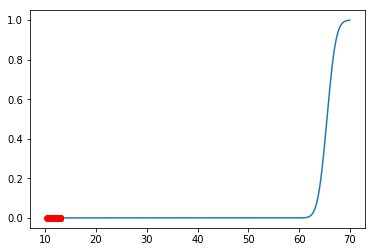

In [380]:
x_axis = np.arange(10, 70, 0.04)

plt.plot(x_axis, norm.cdf(x_axis, MM, SS))
plt.plot(b, [0] * len(b), 'ro')
plt.show()